In [ ]:
#libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load data
df=pd.read_csv('/content/DS DATA.csv')
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [ ]:
df.shape

(32561, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [ ]:
df.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,Unnamed: 15
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,2.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,55000.0
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,55000.0
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,55000.0
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,55000.0
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,55000.0
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,55000.0


In [ ]:
#missing values
df.isnull().sum()

,0
Age,0
Profession Class,0
Final_census,0
Education,0
Education-num,0
marital-status,0
occupation,0
relationship,0
race,0
Gender,0


In [ ]:
#drop irrelevant columns
df.drop(['Unnamed: 15'],axis=1,inplace=True)

In [ ]:
print('After dropping irrelevant columns')
df.isnull()

After dropping irrelevant columns


,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#outlier detection

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply the function
clean_df = remove_outliers(df, numeric_cols)

print("Original data shape:", df.shape)
print("After removing outliers:", clean_df.shape)


Original data shape: (32561, 15)
After removing outliers: (19004, 15)


In [ ]:
# Check skewness for numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skew_values = df[numeric_cols].skew().sort_values(ascending=False)
print(skew_values)


 capital-gain      11.953848
 capital-loss       4.594629
Final_census        1.446980
Age                 0.558743
 hours-per-week     0.227643
 Education-num     -0.311676
dtype: float64


In [ ]:
#handling skewness
df[' capital-gain'] = np.log1p(df[' capital-gain'])
df[' capital-loss'] = np.log1p(df[' capital-loss'])


In [ ]:
# Recheck skewness after transformation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
new_skew_values = df[numeric_cols].skew().sort_values(ascending=False)
print(new_skew_values)


 capital-loss      4.307537
 capital-gain      3.096144
Final_census       1.446980
Age                0.558743
 hours-per-week    0.227643
 Education-num    -0.311676
dtype: float64


In [ ]:
#Feature selection
df.columns = df.columns.str.strip()

df.columns



Index(['Age', 'Profession Class', 'Final_census', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [ ]:
df.dtypes


,0
Age,int64
Profession Class,object
Final_census,int64
Education,object
Education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
Gender,object


In [ ]:
#Categorical features
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Profession Class', 'Education', 'marital-status', 'occupation',
       'relationship', 'race', 'Gender', 'country', 'income'],
      dtype='object')

In [ ]:
for col in cat_cols:
  print(f"{col}: {df[col].nunique()} unique values")

Profession Class: 9 unique values
Education: 16 unique values
marital-status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
Gender: 2 unique values
country: 42 unique values
income: 2 unique values


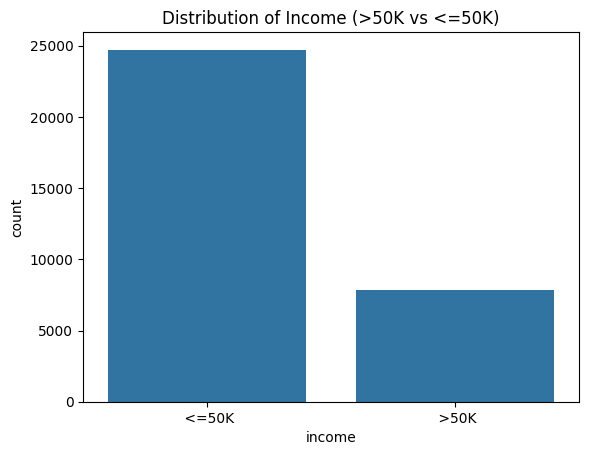

In [ ]:
#Target distribution

sns.countplot(x='income', data=df)
plt.title('Distribution of Income (>50K vs <=50K)')
plt.show()


In [ ]:
#Reation with categorical column with target
from scipy.stats import chi2_contingency

for col in cat_cols:
    if col != 'income':  # exclude the target
        table = pd.crosstab(df[col], df['income'])
        chi2, p, dof, expected = chi2_contingency(table)
        print(f"{col}: p-value = {p}")


Profession Class: p-value = 2.026505431120716e-220
Education: p-value = 0.0
marital-status: p-value = 0.0
occupation: p-value = 0.0
relationship: p-value = 0.0
race: p-value = 2.305960610160958e-70
Gender: p-value = 0.0
country: p-value = 2.2113858852543023e-44


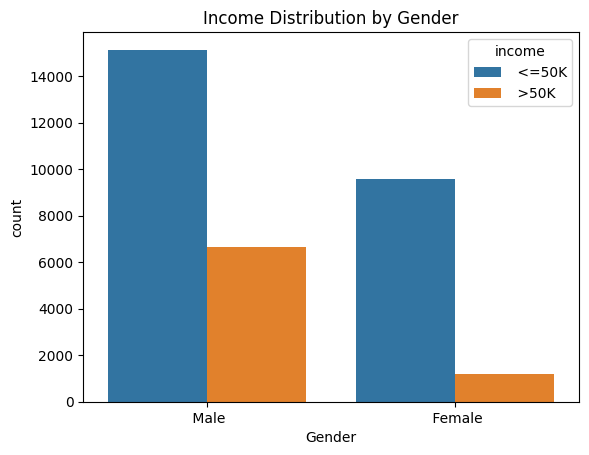

In [ ]:
#gender vs income

sns.countplot(x='Gender', hue='income', data=df)
plt.title('Income Distribution by Gender')
plt.show()


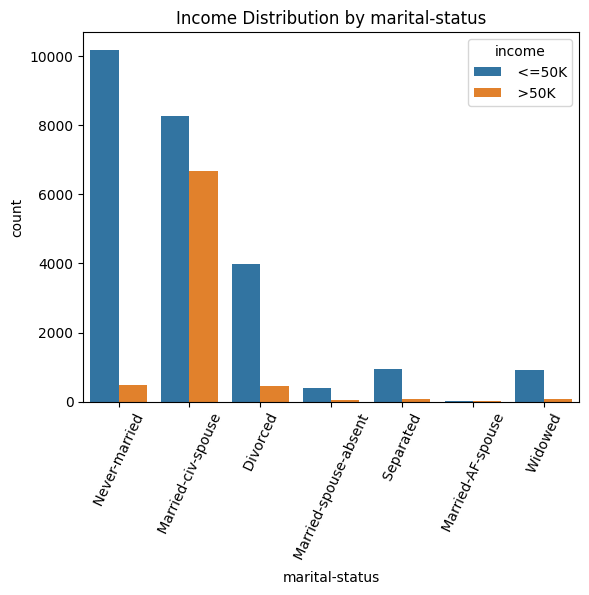

In [ ]:
#martial-status vs income

sns.countplot(x='marital-status', hue='income', data=df)
plt.title('Income Distribution by marital-status')
plt.xticks(rotation=65)
plt.show()


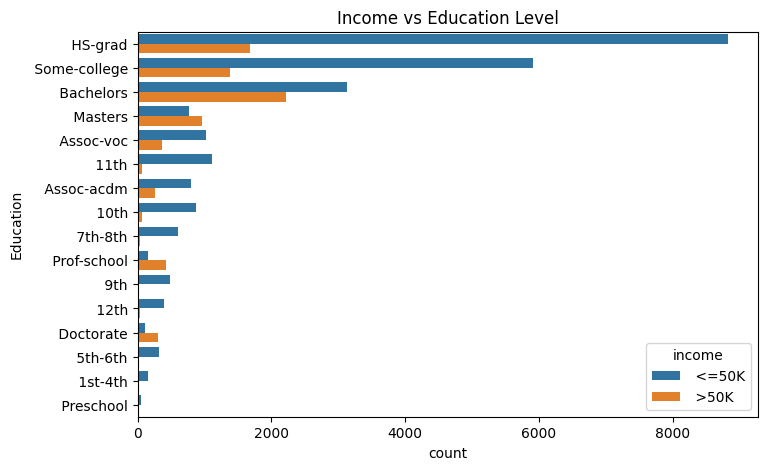

In [ ]:
#income vs education

plt.figure(figsize=(8,5))
sns.countplot(y='Education', hue='income', data=df, order=df['Education'].value_counts().index)
plt.title('Income vs Education Level')
plt.show()


In [ ]:
#correlation

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[num_cols].corr()
print(corr_matrix)

                     Age  Final_census  Education-num  capital-gain  \
Age             1.000000     -0.076646       0.036527      0.124183   
Final_census   -0.076646      1.000000      -0.043195     -0.004414   
Education-num   0.036527     -0.043195       1.000000      0.129135   
capital-gain    0.124183     -0.004414       0.129135      1.000000   
capital-loss    0.051448     -0.009122       0.077143     -0.066161   
hours-per-week  0.068756     -0.018768       0.148123      0.083821   

                capital-loss  hours-per-week  
Age                 0.051448        0.068756  
Final_census       -0.009122       -0.018768  
Education-num       0.077143        0.148123  
capital-gain       -0.066161        0.083821  
capital-loss        1.000000        0.051287  
hours-per-week      0.051287        1.000000  


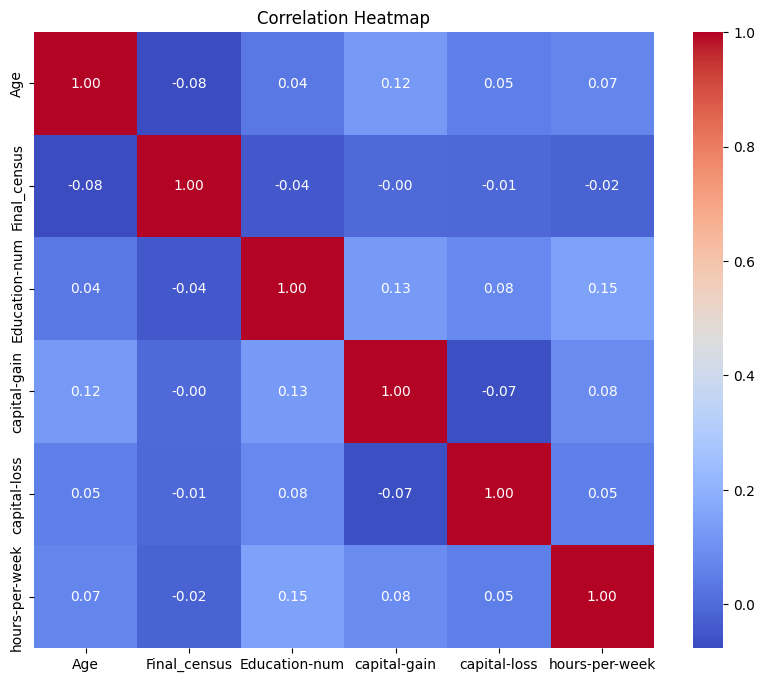

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


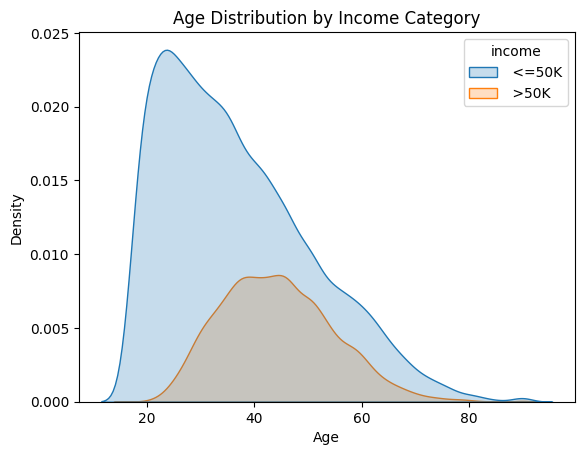

In [ ]:
#Age by  income

sns.kdeplot(data=df, x='Age', hue='income', fill=True)
plt.title('Age Distribution by Income Category')
plt.show()


In [ ]:
#encoding

df_original = df.copy()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Separate target first
y = df['income']
X = df.drop('income', axis=1)

# Encoding feature
cat_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

#encoding target
le = LabelEncoder()
y = le.fit_transform(y)

print("One-Hot Encoding Done")
print("Encoded shape:", X_encoded.shape)


One-Hot Encoding Done
Encoded shape: (32561, 100)


In [ ]:
#scaling

from sklearn.preprocessing import StandardScaler

num_cols = X_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])


In [ ]:
#modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#checking balanced or imbalanced
df['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


In [ ]:
#Apply SMOTE

from imblearn.over_sampling import SMOTE
# 1️⃣ Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 2️⃣ Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3️⃣ Check before and after
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_res).value_counts())


Before SMOTE:
0    19775
1     6273
Name: count, dtype: int64

After SMOTE:
1    19775
0    19775
Name: count, dtype: int64


In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}


In [ ]:
# Cross-validation + training + test evaluation
for name, model in models.items():
    print(f"\n Model: {name}")

# Cross-validation (on resampled train data)
    cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)* 100
    std_dev = np.std(cv_scores)* 100
    print(f"CV Mean Accuracy: {mean_accuracy:.2f}%")
    print(f"CV Std Dev: {std_dev:.2f}%")




 Model: Logistic Regression
CV Mean Accuracy: 84.78%
CV Std Dev: 2.93%

 Model: Decision Tree
CV Mean Accuracy: 85.31%
CV Std Dev: 3.81%

 Model: Random Forest
CV Mean Accuracy: 90.19%
CV Std Dev: 2.99%

 Model: Gradient Boosting
CV Mean Accuracy: 86.33%
CV Std Dev: 2.23%

 Model: XGBoost
CV Mean Accuracy: 88.78%
CV Std Dev: 4.33%


In [ ]:
# Fit and evaluate on test data
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)* 100
print(f"Test Accuracy: {accuracy: .2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy:  85.84%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      4945
           1       0.68      0.76      0.72      1568

    accuracy                           0.86      6513
   macro avg       0.80      0.83      0.81      6513
weighted avg       0.87      0.86      0.86      6513

Confusion Matrix:
 [[4393  552]
 [ 370 1198]]


ROC-AUC Score: 0.9239752713522215


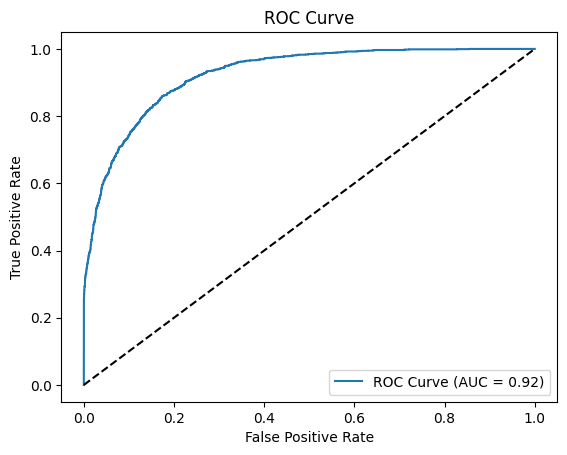

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC-AUC Score
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 10 features
print(feature_importance.head(10))

                               Feature  Importance
30  marital-status_ Married-civ-spouse    0.363270
3                         capital-gain    0.041976
2                        Education-num    0.038514
24                  Education_ HS-grad    0.032135
97              country_ United-States    0.025005
44          occupation_ Prof-specialty    0.019274
38         occupation_ Exec-managerial    0.018793
55                         race_ Black    0.016750
5                       hours-per-week    0.016732
49         relationship_ Not-in-family    0.016498


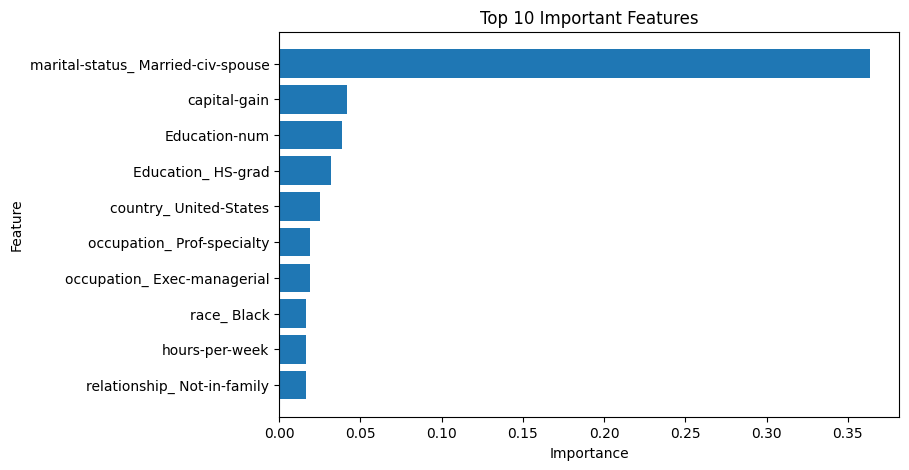

In [ ]:
# Plot top 10 features
plt.figure(figsize=(8,5))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.gca().invert_yaxis()
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()